<div>
    <div style="float:left;width:50%;text-align:center">
        <h1>pyGIMLi Tutorial @ Transform 2021</h1>
        <div>
<table style="border-collapse:collapse;border-color:#ccc;border-spacing:0" class="tg"><thead><tr><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal"></th><th style="background-color:#f0f0f0;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Info</th></tr></thead><tbody><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">When</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Monday, April 19 • 8:00 - 9:00 UTC (starts at 10.00 a.m. CET)</td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Slack (Q&amp;A)</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://softwareunderground.org/">Software Underground</a> channel <a href="https://swung.slack.com/archives/C01T5V5S9EV">#t21-mon-pygimli</a></td></tr><tr><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">Live stream</td><td style="background-color:#f9f9f9;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://youtu.be/w3pu0H3dXe8">https://youtu.be/w3pu0H3dXe8</a></td></tr><tr><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:middle;word-break:normal">pyGIMLi documentation</td><td style="background-color:#fff;border-color:#ccc;border-style:solid;border-width:1px;color:#333;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;text-decoration:underline;vertical-align:top;word-break:normal"><a href="https://www.pygimli.org/documentation.html">https://www.pygimli.org/documentation.html</a></td></tr></tbody></table>
        </div>
    </div>
    <div style="float:right;width:30%">
        <img src="https://www.pygimli.org/_images/pg_logo.png" alt="pyGIMLi logo">
    </div>
</div>

# Introduction to method managers: Traveltime inversion

In [ ]:
# Just some plotting settings
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")
%config InlineBackend.figure_format='svg' # Setting figure format for this notebook

In [6]:
import numpy as np
import pygimli as pg
import pygimli.physics.traveltime as tt

In [11]:
data = tt.load("traveltime.dat")
print(data)

Data: Sensors: 20 data: 100, nonzero entries: ['err', 'g', 's', 't', 'valid']


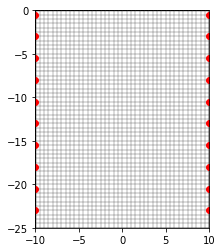

In [13]:
dx = 0.5
x = np.arange(-10, 10.1, dx)
y = np.arange(-25, 0.1, dx)
grid = pg.meshtools.createMesh2D(x, y)
ax, cb = pg.show(grid)
ax.plot(pg.x(data), pg.y(data), "ro");

In [15]:
mgr = tt.TravelTimeManager(data)
print(mgr) # shit

99 data of 100 not shown


((<matplotlib.image.AxesImage at 0x1ab42a8db80>,
  <matplotlib.colorbar.Colorbar at 0x1ab426fb100>),
 None)

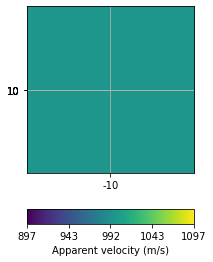

In [19]:
mgr.showData()

18/04/21 - 11:33:44 - pyGIMLi - INFO - Found 1 regions.
18/04/21 - 11:33:44 - pyGIMLi - INFO - Creating forward mesh from region infos.
18/04/21 - 11:33:44 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
18/04/21 - 11:33:44 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
18/04/21 - 11:33:44 - pyGIMLi - INFO - Created startmodel from forward operator: [0.0002     0.0002     0.0002     ... 0.00022318 0.00022318 0.00022318]


(<AxesSubplot:>, <matplotlib.colorbar.Colorbar at 0x1ab2040ec70>)

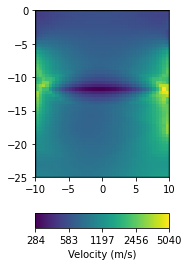

In [16]:
mgr.invert(data, mesh=grid, verbose=True)
mgr.showResult()